---

## Segunda Lista de Exercícios - Pesquisa Operacional - ELE082
**Nome: $\color{red}{\text{Antonio Carlos da Anunciação}}$**

Matricula: 2018019443

Professor: Eduardo Gontijo Carrano

---
*Solução da segunda lista de exercícios da disciplina Pequisa Operacional, Universidade Federal de Minas Gerais, curso Engenharia de Sistemas*

---
#### Implementação dos algoritmos:

In [1]:
from collections import defaultdict

# Algoritmos de Dijkstra
def dijkstra(grafo, origem, tipo = "min"): #retorna a distancia de um dado nó para todos os outros possíveis.

    controle = { }
    distanciaAtual = { }
    noAtual = { }
    naoVisitados = []
    atual = origem
    noAtual[atual] = 0
    
    for vertice in grafo.keys():
        naoVisitados.append(vertice) #inclui os vertices nos não visitados
        if tipo == "max":
            distanciaAtual[vertice] = float('-inf') #inicia os vertices como -infinito
        else:
            distanciaAtual[vertice] = float('inf') #inicia os vertices como infinito

    distanciaAtual[atual] = 0

    naoVisitados.remove(atual)

    while naoVisitados:
        for vizinho, peso in grafo[atual].items():
            pesoCalc = peso + noAtual[atual]
            if tipo == "max":
                if distanciaAtual[vizinho] == float('-inf') or distanciaAtual[vizinho] < pesoCalc:
                    distanciaAtual[vizinho] = pesoCalc
                    controle[vizinho] = distanciaAtual[vizinho]
            else:
                if distanciaAtual[vizinho] == float("inf") or distanciaAtual[vizinho] > pesoCalc:
                    distanciaAtual[vizinho] = pesoCalc
                    controle[vizinho] = distanciaAtual[vizinho]

        if controle == {} : break
            
        if tipo == "max":
            Vizinho = max(controle.items(), key=lambda x: x[1]) #seleciona o maior vizinho
        else:
            Vizinho = min(controle.items(), key=lambda x: x[1]) #seleciona o menor vizinho
            
        atual=Vizinho[0]
        noAtual[atual] = Vizinho[1]
        naoVisitados.remove(atual)
        del controle[atual]

    print(distanciaAtual)

    
def dijkstra_path(grafo, origem, fim, tipo = "min"): #retorna a distancia de um No origem até um No destino e o caminho até ele

    controle = { }
    distanciaAtual = { }
    noAtual = { }
    naoVisitados = []
    atual = origem
    noAtual[atual] = 0

    
    for vertice in grafo.keys():
        naoVisitados.append(vertice) #inclui os vertices nos não visitados
        if tipo == "max":
            distanciaAtual[vertice] = float('-inf') #inicia os vertices como -infinito
        else:
            distanciaAtual[vertice] = float('inf') #inicia os vertices como infinito

    distanciaAtual[atual] = [0,origem] 

    naoVisitados.remove(atual)

    while naoVisitados:
        for vizinho, peso in grafo[atual].items():
            pesoCalc = peso + noAtual[atual]
            if tipo == "max":
                if distanciaAtual[vizinho] == float("-inf") or distanciaAtual[vizinho][0] < pesoCalc:
                    distanciaAtual[vizinho] = [pesoCalc,atual]
                    controle[vizinho] = pesoCalc
                    print(controle)
            else:
                if distanciaAtual[vizinho] == float("inf") or distanciaAtual[vizinho][0] > pesoCalc:
                    distanciaAtual[vizinho] = [pesoCalc,atual]
                    controle[vizinho] = pesoCalc
                    print(controle)
                 
        if controle == {} : break
        
        if tipo == "max":
            Vizinho = max(controle.items(), key=lambda x: x[1]) #seleciona o maior vizinho
        else:
            Vizinho = min(controle.items(), key=lambda x: x[1]) #seleciona o menor vizinho
            
        atual = Vizinho[0]
        noAtual[atual] = Vizinho[1]
        naoVisitados.remove(atual)
        del controle[atual]
        
    if tipo == "max":
        print("A maior distância de %s até %s é: %s" % (origem, fim, distanciaAtual[fim][0]))
        print("O maior caminho é: %s" % printPath(distanciaAtual,origem, fim))
    else:
        print("A menor distância de %s até %s é: %s" % (origem, fim, distanciaAtual[fim][0]))
        print("O menor caminho é: %s" % printPath(distanciaAtual,origem, fim))  

        
def printPath(distancias,inicio, fim):
        if  fim != inicio:
            return "%s -- > %s" % (printPath(distancias,inicio, distancias[fim][1]),fim)
        else:
            return inicio

#--------------------------------------------------------------------------------------------------------------------
# Arvores geradoras, utilizando classe grafo

# Algoritmo de Kruskal
class Graph1:
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph1 = []
     
    def addEdge(self, u, v, w):
        self.graph1.append([u, v, w])
            
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    def KruskalMST(self):
 
        result = []
 
        i = 0
        e = 0
 
        self.graph1 =  sorted(self.graph1, key=lambda item: item[2])
 
        parent, rank = [], []

        for node in range(self.V):
            parent.append(node)
            rank.append(0)
     
        while e < self.V-1:	
            u, v, w =  self.graph1[i]
            i += 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            if x != y:
                e += 1  
                result.append([u, v, w])
                self.union(parent, rank, x, y)
                print("Passo:", e)
                for u, v, weight in result:
                    print("%d - %d = %d" % (u+1, v+1, weight))
 
        print("\nArvore geradora mínima, Kruskal:")
        for u, v, weight in result:
            print("%d - %d = %d" % (u+1, v+1, weight))

# Algoritmo de Prim
class Graph2():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] 
                      for row in range(vertices)]
    
    def printMST(self, parent):
        print ("Arvore geradora mínima, Prim:")
        for i in range(1,self.V):
            print (parent[i]+1,"-",i+1,"\t",self.graph[i][ parent[i] ])

    def minKey(self, key, mstSet):
        min = 1000000
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index

    def primMST(self):

        key = [1000000] * self.V
        parent = [None] * self.V 
        key[0] = 0   
        mstSet = [False] * self.V
        parent[0] = -1  
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u
        self.printMST(parent)


# Algoritmo de Ford-Fulkerson
class Graph3():

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)

    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


---
**Questão 1:**

Para o grafo da Fig. 1, encontre o caminho mínimo entre os vértices 1 e 6. Assuma que os números acima das
arestas representam os seus custos.
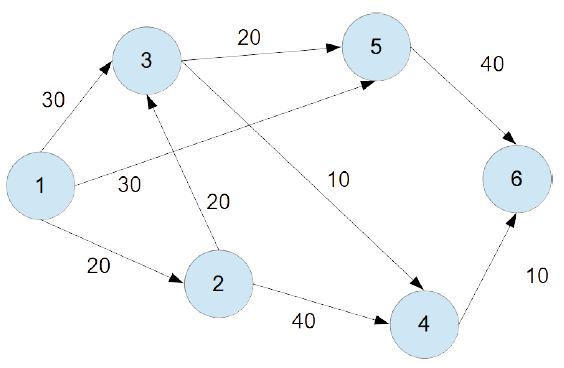
<h4 align="center">FIG. 1</h4> 

In [2]:
# Representação do Grafo da Fig.1:
grafo1 = { "1" : { "2":20, "3":30, "5":30 },
          "2" : { "3":20, "4":40 },
          "3" : { "4":10, "5":20 },
          "4" : { "6":10 },
          "5" : { "6":40 },
          "6" : { }
          }

Caminho mínimo até o vertice 6:

In [3]:
dijkstra_path(grafo1, "1", "6")

{'2': 20}
{'2': 20, '3': 30}
{'2': 20, '3': 30, '5': 30}
{'3': 30, '5': 30, '4': 60}
{'5': 30, '4': 40}
{'4': 40, '6': 70}
{'6': 50}
A menor distância de 1 até 6 é: 50
O menor caminho é: 1 -- > 3 -- > 4 -- > 6


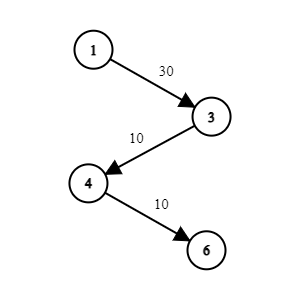

---
**Questão 2:**

Para o grafo da Fig. 1, encontre o caminho máximo entre os vértices 1 e 6. Assuma que os números acima das
arestas representam os seus custos.

Caminho máximo até o vertice 6:

In [4]:
dijkstra_path(grafo1, "1", "6", "max")

{'2': 20}
{'2': 20, '3': 30}
{'2': 20, '3': 30, '5': 30}
{'2': 20, '5': 30, '4': 40}
{'2': 20, '5': 50, '4': 40}
{'2': 20, '4': 40, '6': 90}
A maior distância de 1 até 6 é: 90
O maior caminho é: 1 -- > 3 -- > 5 -- > 6


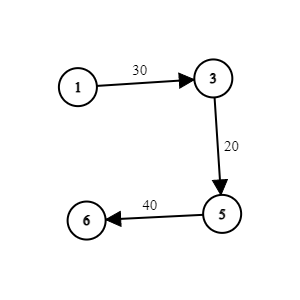

---
**Questão 3:**

Para o grafo da Fig. 1, assumindo que os números acima das arestas representam os seus custos:

(a) Encontre, passo a passo, a árvore geradora mínima utilizando o algoritmo de Kruskal.

In [5]:
g1 = Graph1(6)
g1.addEdge(0, 1, 20)
g1.addEdge(0, 2, 30)
g1.addEdge(0, 4, 30)
g1.addEdge(1, 2, 20)
g1.addEdge(1, 3, 40)
g1.addEdge(2, 3, 10)
g1.addEdge(2, 4, 20)
g1.addEdge(3, 5, 10)
g1.addEdge(4, 5, 40)

In [6]:

g1.KruskalMST()

Passo: 1
3 - 4 = 10
Passo: 2
3 - 4 = 10
4 - 6 = 10
Passo: 3
3 - 4 = 10
4 - 6 = 10
1 - 2 = 20
Passo: 4
3 - 4 = 10
4 - 6 = 10
1 - 2 = 20
2 - 3 = 20
Passo: 5
3 - 4 = 10
4 - 6 = 10
1 - 2 = 20
2 - 3 = 20
3 - 5 = 20

Arvore geradora mínima, Kruskal:
3 - 4 = 10
4 - 6 = 10
1 - 2 = 20
2 - 3 = 20
3 - 5 = 20


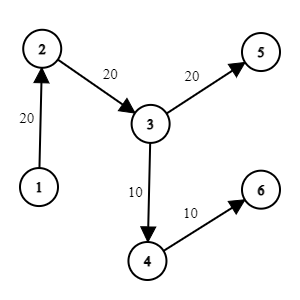

(b) Encontre, passo a passo, a árvore geradora mínima utilizando o algoritmo de Prim.

In [7]:
g2 = Graph2(6)
g2.graph = [ [0, 20, 30, 0, 30, 0], 
            [20, 0, 20, 40, 0, 0], 
            [30, 20, 0, 10, 20, 0], 
            [0, 40, 10, 0, 0, 10], 
            [30, 0, 20, 0, 0, 40],
            [0, 0, 0, 10, 40, 0]] 
  
g2.primMST(); 

Arvore geradora mínima, Prim:
1 - 2 	 20
2 - 3 	 20
3 - 4 	 10
3 - 5 	 20
4 - 6 	 10


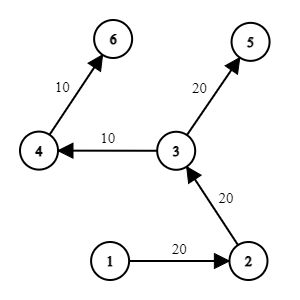

---
**Questão 4:**
    
Considere o grafo de 7 vértices descrito pela Tab. 1.
<h4 align="center">Tabela 1: Especicação dos arcos da questão 4</h4>

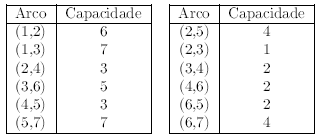

(a) Esboce a rede correspondente.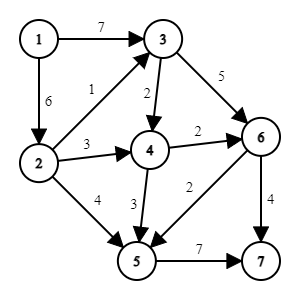

(b) Determine a matriz de incidência nó-arco associada a esta rede.
$$\textrm{Matriz de Incidencia [Vertices x Pesos]}\ = 
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 0 & -1 & 0 \\
-1 & 1 & 0 & 0 & 1 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & -1 & -1 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & -1 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 & -1
\end{bmatrix}$$

(c) Ache o fuxo máximo do nó 1 ao nó 7 da rede.

In [8]:
# Representação do Grafo da Tab.1 como Matriz de Adjacencia:
grafo4= [[0, 6, 7, 0, 0, 0, 0],
        [0, 0, 1, 3, 0, 0, 0],
        [0, 0, 0, 2, 0, 5, 0],
        [0, 0, 0, 0, 3, 2, 0],
        [0, 0, 0, 0, 0, 0, 7],
        [0, 0, 0, 0, 2, 0, 4],
		[0, 0, 0, 0, 0, 0, 0]]
g4 = Graph3(grafo4)
inicio, fim = 0, 6
# Fluxo Máximo:
print ("Fluxo máximo: %d " % g4.ford_fulkerson(inicio, fim))

Fluxo máximo: 9 


---
**Questão 5:**
<p style='text-align: justify;'>
Suponha que uma empresa transportadora de cargas possui três caminhões que estão atualmente nas posições 1 e 2 da rede rodoviária de uma cidade esquematizada na Fig. 1. No nó 1 estão dois caminhões da empresa e no nó 2 está o terceiro caminhão. Um novo pedido de frete foi solicitado na localidade 6. Para este pedido, são necessários três caminhões. Além disso, a carga precisa ser retirada dentro de 50 minutos, devido a restrições de transito. Determine se a empresa transportadora poderá atender a este pedido. Neste caso, o número acima de cada aresta representa o número de minutos necessários para o caminhão percorrer o respectivo arco.
</p>

In [9]:
print("Detalhe do caminho 1-6:")
dijkstra_path(grafo1, "1", "6")
print("\nDetalhe do caminho 2-6:")
dijkstra_path(grafo1, "2", "6")

Detalhe do caminho 1-6:
{'2': 20}
{'2': 20, '3': 30}
{'2': 20, '3': 30, '5': 30}
{'3': 30, '5': 30, '4': 60}
{'5': 30, '4': 40}
{'4': 40, '6': 70}
{'6': 50}
A menor distância de 1 até 6 é: 50
O menor caminho é: 1 -- > 3 -- > 4 -- > 6

Detalhe do caminho 2-6:
{'3': 20}
{'3': 20, '4': 40}
{'4': 30}
{'4': 30, '5': 40}
{'5': 40, '6': 40}
A menor distância de 2 até 6 é: 40
O menor caminho é: 2 -- > 3 -- > 4 -- > 6


***Temos que os tempos respectivamente dos caminhos 1-6 e 2-6 são 50min e 40min, dessa maneira a empresa será capaz de atender o pedido dentro do prazo estabelecido.***

---
**Questão 6:**

Para o grafo da Fig. 2, encontre o caminho mínimo entre os vértices A e G. Assuma que os números acima das arestas representam os seus custos.
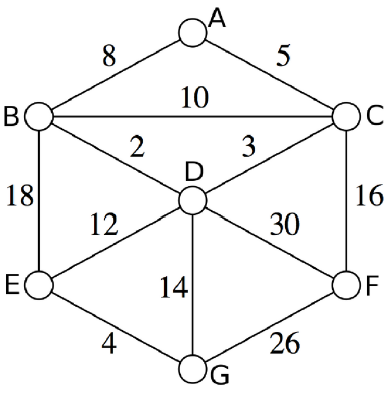
<h4 align="center">FIG. 2</h4> 

In [10]:
# Representação do Grafo da Fig.2:
grafo2 = { "A" : { "B":8, "C":5 },
          "B" : { "A":8, "C":10, "D":2, "E":18 },
          "C" : { "A":5, "B":10, "D":3, "F":16 },
          "D" : { "B":2, "C":3, "E":12, "F":30 },
          "E" : { "B":18, "D":12, "G":4 },
          "F" : { "C":16, "D":30, "G":26 },
          "G" : { "D":14,"E":4, "F":26 }
          }

Caminho máximo de A até o vertice G:

In [11]:
dijkstra_path(grafo2, "A", "G")

{'B': 8}
{'B': 8, 'C': 5}
{'B': 8, 'D': 8}
{'B': 8, 'D': 8, 'F': 21}
{'D': 8, 'F': 21, 'E': 26}
{'F': 21, 'E': 20}
{'F': 21, 'G': 24}
A menor distância de A até G é: 24
O menor caminho é: A -- > C -- > D -- > E -- > G


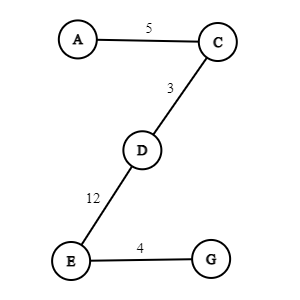

---
**Questão 7:**

Para o grafo da Fig. 2, assumindo que os números acima das arestas representam os seus custos:

(a) Encontre, passo a passo, a árvore geradora mínima utilizando o algoritmo de Kruskal

In [12]:
g7a = Graph1(7)
g7a.addEdge(0, 1, 8)
g7a.addEdge(0, 2, 5)
g7a.addEdge(1, 0, 8)
g7a.addEdge(1, 2, 10)
g7a.addEdge(1, 3, 2)
g7a.addEdge(1, 4, 18)
g7a.addEdge(2, 0, 5)
g7a.addEdge(2, 1, 10)
g7a.addEdge(2, 3, 3)
g7a.addEdge(2, 5, 16)
g7a.addEdge(3, 1, 2)
g7a.addEdge(3, 2, 3)
g7a.addEdge(3, 4, 12)
g7a.addEdge(3, 5, 30)
g7a.addEdge(3, 6, 14)
g7a.addEdge(4, 1, 18)
g7a.addEdge(4, 3, 12)
g7a.addEdge(4, 6, 4)
g7a.addEdge(5, 2, 16)
g7a.addEdge(5, 3, 30)
g7a.addEdge(5, 6, 26)
g7a.addEdge(6, 3, 14)
g7a.addEdge(6, 4, 4)
g7a.addEdge(6, 5, 26)

In [13]:
g7a.KruskalMST()

Passo: 1
2 - 4 = 2
Passo: 2
2 - 4 = 2
3 - 4 = 3
Passo: 3
2 - 4 = 2
3 - 4 = 3
5 - 7 = 4
Passo: 4
2 - 4 = 2
3 - 4 = 3
5 - 7 = 4
1 - 3 = 5
Passo: 5
2 - 4 = 2
3 - 4 = 3
5 - 7 = 4
1 - 3 = 5
4 - 5 = 12
Passo: 6
2 - 4 = 2
3 - 4 = 3
5 - 7 = 4
1 - 3 = 5
4 - 5 = 12
3 - 6 = 16

Arvore geradora mínima, Kruskal:
2 - 4 = 2
3 - 4 = 3
5 - 7 = 4
1 - 3 = 5
4 - 5 = 12
3 - 6 = 16


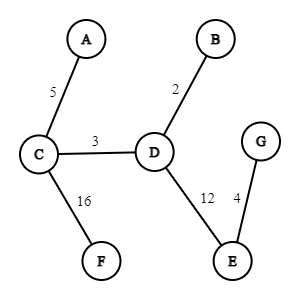

(b) Encontre, passo a passo, a árvore geradora mínima utilizando o algoritmo de Prim.

In [14]:
g7b = Graph2(7) 
g7b.graph = [ [0, 8, 5, 0, 0, 0, 0], 
            [8, 0, 10, 2, 18, 0, 0], 
            [5, 10, 0, 3, 0, 16, 0], 
            [0, 2, 3, 0, 12, 30, 14], 
            [0, 18, 0, 12, 0, 0, 4],
            [0, 0, 16, 30, 0, 0, 26],
            [0, 0, 16, 14, 4, 26, 0]] 
  
g7b.primMST(); 

Arvore geradora mínima, Prim:
4 - 2 	 2
1 - 3 	 5
3 - 4 	 3
4 - 5 	 12
3 - 6 	 16
5 - 7 	 4


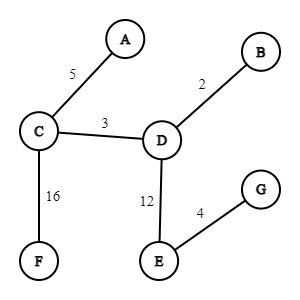

---
**Questão 8:**

Para o grafo da Fig. 2, encontre o fluxo máximo entre os vértices A e G. Acima que os número acima das arestas representam suas respectivas capacidades.

In [15]:
grafo8 = [ [0, 8, 5, 0, 0, 0, 0], 
        [8, 0, 10, 2, 18, 0, 0], 
        [5, 10, 0, 3, 0, 16, 0], 
        [0, 2, 3, 0, 12, 30, 14], 
        [0, 18, 0, 12, 0, 0, 4],
        [0, 0, 16, 30, 0, 0, 26],
        [0, 0, 16, 14, 4, 26, 0]] 

g8 = Graph3(grafo8)
A, G = 0, 6
  
print ("Fluxo máximo: %d " % g8.ford_fulkerson(A, G))

Fluxo máximo: 13 


---
**Questão 9:**

Sobre os algoritmos de Branch and Bound and Branch and Cut, responda:

(a) Por que estes métodos não são adequados para grandes instâncias de alguns problemas PLI?

***Porque ambos os métodos são tipicamente exponenciais em termos de complexidade de tempo e podem exigir a exploração de todas as permutações possíveis no pior caso.***

(b) Qual a principal diferença do algoritmo de Branch and Cut quando comparado ao Branch and Bound? Em geral, qual deles é mais eficiente?

***O método Branch and cut é uma melhoria do método branch and bound, está melhoria se da atraves da combinação do branch and bound com o método de planos de corte(desigualdade de Gomory). Assim a cada nó a espaço de soluções diminue, o que reduz o tempo computacional e faz o algoritmo Branch and Cut ser mais eficiente.***

(c) Suponha que o algoritmo Branch and Bound seja aplicado para resolver o problema PLI apresentado nas equações (1) e (2), onde P(i) e S(i) são os conjuntos de predecessores e sucessores do vértice i, respectivamente. Quantos problemas relaxados de programação linear deverão ser resolvidos pelo algoritmo Branch and Bound até que ele alcance a solução ótima?

$$\begin{equation} min \sum_{i = 1}^{n}\sum_{j \in S(i)} c_{ij}x_{ij}\end{equation}\qquad \textrm{(1)}$$
$$
\begin{equation}
 Sujeito
    \begin{cases}
      \displaystyle\sum_{j \in S(i)} x_{1i} = 1\\
      \displaystyle\sum_{i \in P(n)} x_{in} = 1\\
      \displaystyle\sum_{i \in P(j)} x_{ij} = \displaystyle\sum_{k \in S(j)} x_{kj}, \forall j \in \{2, ..., n-1\}\\
       x_{ij} \in \{0, 1 \}, \forall i \in \{1, ..., n\}, \forall j \in \{1, ..., n\}\\
    \end{cases}       
\end{equation}
\quad \textrm{(2)}$$

$$
\begin{equation}
 Sujeito
    \begin{cases}
      ...\\
      ...\\
      ...\\
       x_{ij} \in \{0, 1 \}, \forall i \in \{1, ..., n\}, \forall j \in \{1, ..., n\}\\
    \end{cases}       
\end{equation}$$

***A condição acima nos indica que nooso PLI tem uma variável binária, e para n variáveis binárias teremos 2^n
nós a serem explorados, cada um com um problema Linear irrestrito a ser resolvido.***


---
**Questão 10:**
    
Para cada um dos itens abaixo, identifique apenas a complexidade do pior caso, em função do número de vértices N. Exemplos: O(1), O(logN), O(N), O(N logN), O(N²), etc.
    
(a) A respeito da representação de árvores por listas de adjacências responda:
1. Qual a complexidade de armazenamento em memória da árvore?

    ***Espaço de armazenamento: O(N)***


2. Qual a complexidade de se identificar se dois vértices i e j são adjacentes?

    ***Tempo para verificar se uma aresta existe entre "i" e "j": O(N)***


3. Qual a complexidade de ser recuperar a lista completa de vértices adjacentes a um dado vértice i?

    ***Recuperação de uma lista de vertice: O(N)***



(b) A respeito da representação de árvores por matriz de adjacências responda:

1. Qual a complexidade de armazenamento em memória da árvore?

    ***Espaço de armazenamento: O(N²)***


2. Qual a complexidade de se identificar se dois vértices i e j são adjacentes?

    ***Tempo para verificar se uma aresta existe entre "i" e "j": O(1)***


3. Qual a complexidade de ser recuperar a lista completa de vértices adjacentes a um dado vértice i?

    ***Recuperação de uma lista de vertice: O(N²)***

---
### Referencias Bibliográficas:
    1.ARENALES, M., ARMENTANO, V., MORABITO, R., YANASSE, H. “Pesquisa Operacional para Curso de Engenharia”, Elsevier, 2007
    
    2.HILLIER, F. S. e LIEBERMAN, G. J., “Indrodução a Pesquisa Operacionalh”, McGraw-Hill, 2006
    
    3.https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/
    
    4.https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/
    
    5.https://www.geeksforgeeks.org/ford-fulkerson-algorithm-for-maximum-flow-problem/

In [6]:
# Representação do Grafo da Fig.1:
grafop = { "O" : { "A":2, "C":4, "B":5 },
          "A" : { "O":2, "B":2, "D":7 },
          "B" : { "O":5, "A":2, "C":1, "D":4 },
          "C" : { "O":4, "B":1, "E":4 },
          "D" : { "A":7, "B":4, "E":1, "T":5 },
          "E" : { "B":3, "C":4, "D":1, "T":7 },
          "T" : { "D":5, "E":7 }
          }
dijkstra_path(grafop, "O", "T")

{'A': 2}
{'A': 2, 'C': 4}
{'A': 2, 'C': 4, 'B': 5}
{'C': 4, 'B': 4}
{'C': 4, 'B': 4, 'D': 9}
{'B': 4, 'D': 9, 'E': 8}
{'D': 8, 'E': 8}
{'E': 8, 'T': 13}
A menor distância de O até T é: 13
O menor caminho é: O -- > A -- > B -- > D -- > T


In [4]:
gp = Graph1(7)
gp.addEdge(0, 1, 2)
gp.addEdge(0, 3, 7)
gp.addEdge(0, 5, 2)
gp.addEdge(1, 0, 7)
gp.addEdge(1, 3, 4)
gp.addEdge(1, 2, 1)
gp.addEdge(1, 4, 3)
gp.addEdge(1, 5, 5)
gp.addEdge(2, 1, 1)
gp.addEdge(2, 4, 4)
gp.addEdge(2, 5, 4)
gp.addEdge(3, 0, 7)
gp.addEdge(3, 1, 4)
gp.addEdge(3, 4, 1)
gp.addEdge(3, 6, 5)
gp.addEdge(4, 1, 3)
gp.addEdge(4, 2, 4)
gp.addEdge(4, 3, 1)
gp.addEdge(4, 6, 7)
gp.addEdge(5, 0, 2)
gp.addEdge(5, 1, 5)
gp.addEdge(5, 2, 4)
gp.addEdge(6, 3, 5)
gp.addEdge(6, 4, 7)


gp.KruskalMST()

Passo: 1
2 - 3 = 1
Passo: 2
2 - 3 = 1
4 - 5 = 1
Passo: 3
2 - 3 = 1
4 - 5 = 1
1 - 2 = 2
Passo: 4
2 - 3 = 1
4 - 5 = 1
1 - 2 = 2
1 - 6 = 2
Passo: 5
2 - 3 = 1
4 - 5 = 1
1 - 2 = 2
1 - 6 = 2
2 - 5 = 3
Passo: 6
2 - 3 = 1
4 - 5 = 1
1 - 2 = 2
1 - 6 = 2
2 - 5 = 3
4 - 7 = 5

Arvore geradora mínima, Kruskal:
2 - 3 = 1
4 - 5 = 1
1 - 2 = 2
1 - 6 = 2
2 - 5 = 3
4 - 7 = 5
